https://www.alpha-i.co/blog/MNIST-for-ML-beginners-The-Bayesian-Way.html

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
#from edward.models import Categorical, Normal
#import edward as ed
import pandas as pd
import pickle
import seaborn as sns
#ed.set_seed(314159)

/Users/karimimohammedbelhal/Desktop/ongoing/hostnfly/deeptech/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#error = pd.read_csv('precisionsim2.csv')
error = pd.read_csv('precisionsimVM.csv')

In [3]:
xaxis = np.unique(error.datasize)

In [4]:
fiem = error[error.algo=="SAGA"]
fiemmean = []
fiemmax = []
fiemmin = []
for element in xaxis:
    mean = np.mean(fiem[fiem.datasize==element].iter)
    maxfiem = np.max(fiem[fiem.datasize==element].iter)
    minfiem = np.min(fiem[fiem.datasize==element].iter)
    fiemmean.append(mean)
    fiemmax.append(maxfiem - mean)
    fiemmin.append(mean - minfiem)
errorsfiem = np.array([fiemmin, fiemmax])

In [5]:
semvr = error[error.algo=="OEMVR"]
semvrmean = []
semvrmax = []
semvrmin = []
for element in xaxis:
    mean = np.mean(semvr[semvr.datasize==element].iter)
    maxsemvr = np.max(semvr[semvr.datasize==element].iter)
    minsemvr = np.min(semvr[semvr.datasize==element].iter)
    semvrmean.append(mean)
    semvrmax.append(maxsemvr - mean)
    semvrmin.append(mean - minsemvr)
errorssemvr = np.array([semvrmin, semvrmax])

In [6]:
em = error[error.algo=="EM"]
emmean = []
emmax = []
emmin = []
for element in xaxis:
    mean = np.mean(em[em.datasize==element].iter)
    maxem = np.max(em[em.datasize==element].iter)
    minem = np.min(em[em.datasize==element].iter)
    emmean.append(mean)
    emmax.append(maxem - mean)
    emmin.append(mean - minem)
errorsem = np.array([emmin, emmax])

iem = error[error.algo=="IEMseq"]
iemmean = []
iemmax = []
iemmin = []
for element in xaxis:
    mean = np.mean(iem[iem.datasize==element].iter)
    maxiem = np.max(iem[iem.datasize==element].iter)
    miniem = np.min(iem[iem.datasize==element].iter)
    iemmean.append(mean)
    iemmax.append(maxiem - mean)
    iemmin.append(mean - miniem)
errorsiem = np.array([iemmin, iemmax])

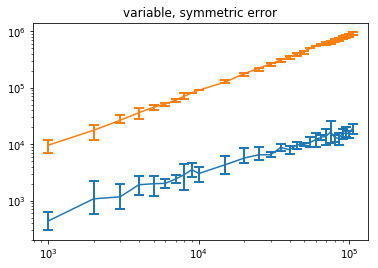

In [7]:
fig, ax0 = plt.subplots(nrows=1, sharex=True)
ax0.set_yscale('log')
ax0.set_xscale('log')
#ax0.errorbar(xaxis, fiemmean, yerr=errorsfiem, fmt='-o',capsize=5, elinewidth=2,markeredgewidth=2)
ax0.errorbar(xaxis, semvrmean, yerr=errorssemvr, fmt='-',capsize=5, elinewidth=2,markeredgewidth=2)
#ax0.errorbar(xaxis, iemmean, yerr=errorsiem, fmt='-',capsize=5, elinewidth=2,markeredgewidth=2)
ax0.errorbar(xaxis, emmean, yerr=errorsem, fmt='-',capsize=5, elinewidth=2,markeredgewidth=2)
ax0.set_title('variable, symmetric error')


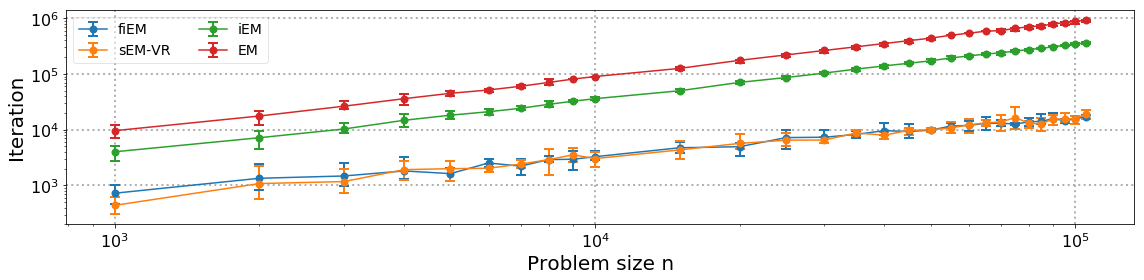

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 4))
ax = plt.subplot(1, 1, 1)
ax.set_yscale('log')
ax.set_xscale('log')
plt.errorbar(xaxis, fiemmean, yerr=errorsfiem, fmt='-o',label='fiEM',capsize=5, elinewidth=2,markeredgewidth=2)
plt.errorbar(xaxis, semvrmean, yerr=errorssemvr, fmt='-o',label='sEM-VR',capsize=5, elinewidth=2,markeredgewidth=2)
plt.errorbar(xaxis, iemmean, yerr=errorsiem, fmt='-o',label='iEM',capsize=5, elinewidth=2,markeredgewidth=2)
plt.errorbar(xaxis, emmean, yerr=errorsem, fmt='-o',label='EM',capsize=5, elinewidth=2,markeredgewidth=2)
#plt.errorbar(xaxis, fiemmean, yerr=errorsfiem, fmt='-o',label='fiEM',capsize=5, elinewidth=2,markeredgewidth=2)
#plt.errorbar(xaxis, fiemmean, yerr=errorsfiem, fmt='-o',label='fiEM',capsize=5, elinewidth=2,markeredgewidth=2)
leg = plt.legend(fontsize=14,fancybox=True, loc=0,ncol=2)
leg.get_frame().set_alpha(0.5)
plt.xlabel('Problem size n', fontsize=20)
plt.ylabel('Iteration', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(linestyle='dotted',linewidth=2)
fig.tight_layout()
plt.show()

In [8]:
singlerun = pd.read_csv('singlerun.csv')
svremrun = singlerun[singlerun.algo=='SVR-EM'].mu1
fiemrun = singlerun[singlerun.algo=='FI-EM'].mu1
emrun = singlerun[singlerun.algo=='EM'].mu1
iemrun = singlerun[singlerun.algo=='IEM'].mu1
oemrun = singlerun[singlerun.algo=='OEM'].mu1
xaxisrun = singlerun[singlerun.algo=='SVR-EM'].iteration
xaxisrunem = singlerun[singlerun.algo=='EM'].iteration

In [9]:
lin = np.array(5*xaxis)
sublin = np.array((10*xaxis)**(2./3))

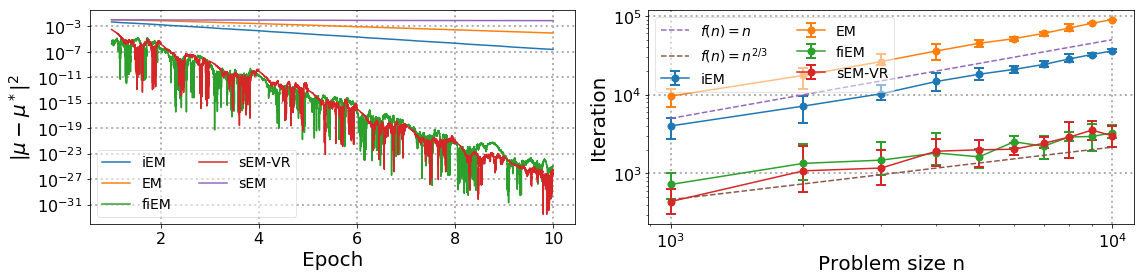

In [45]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 4))
ax = plt.subplot(1, 2, 1)

ax.set_yscale('log')
plt.plot(xaxisrun, iemrun, label='iEM', marker='')
plt.plot(xaxisrunem, emrun, label='EM', marker='')
plt.plot(xaxisrun, fiemrun, label='fiEM', marker='')
plt.plot(xaxisrun, svremrun, label='sEM-VR', marker='')
plt.plot(xaxisrun, oemrun, label='sEM', marker='')
leg = plt.legend(fontsize=14,fancybox=True, loc=3,ncol=2)
leg.get_frame().set_alpha(0.5)
plt.xlabel('Epoch', fontsize=20)
plt.ylabel(r'$|\mu-\mu^*|^2$', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(linestyle='dotted',linewidth=2)

ax = plt.subplot(1, 2, 2)
ax.set_yscale('log')
ax.set_xscale('log')
plt.errorbar(xaxis, iemmean, yerr=errorsiem, fmt='-o',label='iEM',capsize=5, elinewidth=2,markeredgewidth=2)
plt.errorbar(xaxis, emmean, yerr=errorsem, fmt='-o',label='EM',capsize=5, elinewidth=2,markeredgewidth=2)
plt.errorbar(xaxis, fiemmean, yerr=errorsfiem, fmt='-o',label='fiEM',capsize=5, elinewidth=2,markeredgewidth=2)
plt.errorbar(xaxis, semvrmean, yerr=errorssemvr, fmt='-o',label='sEM-VR',capsize=5, elinewidth=2,markeredgewidth=2)
plt.plot(xaxis, lin, label=r'$f(n)=n$', marker='',linestyle='dashed')
plt.plot(xaxis, sublin, label=r'$f(n)=n^{2/3}$', marker='',linestyle='dashed')
leg = plt.legend(fontsize=14,fancybox=True, loc=0,ncol=2)
leg.get_frame().set_alpha(0.5)
plt.xlabel('Problem size n', fontsize=20)
plt.ylabel('Iteration', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(linestyle='dotted',linewidth=2)
fig.tight_layout()
plt.show()

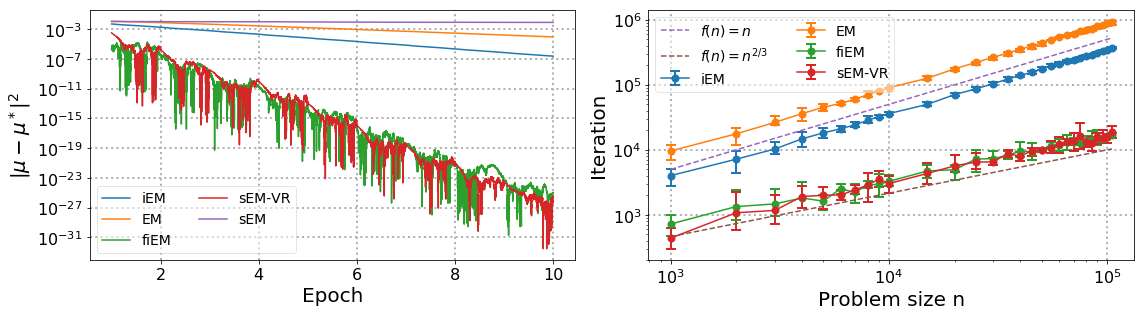

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 4.5))
ax = plt.subplot(1, 2, 1)

ax.set_yscale('log')
plt.plot(xaxisrun, iemrun, label='iEM', marker='')
plt.plot(xaxisrunem, emrun, label='EM', marker='')
plt.plot(xaxisrun, fiemrun, label='fiEM', marker='')
plt.plot(xaxisrun, svremrun, label='sEM-VR', marker='')
plt.plot(xaxisrun, oemrun, label='sEM', marker='')
leg = plt.legend(fontsize=14,fancybox=True, loc=3,ncol=2)
leg.get_frame().set_alpha(0.5)
plt.xlabel('Epoch', fontsize=20)
plt.ylabel(r'$|\mu-\mu^*|^2$', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(linestyle='dotted',linewidth=2)

ax = plt.subplot(1, 2, 2)
ax.set_yscale('log')
ax.set_xscale('log')
plt.errorbar(xaxis, iemmean, yerr=errorsiem, fmt='-o',label='iEM',capsize=5, elinewidth=2,markeredgewidth=2)
plt.errorbar(xaxis, emmean, yerr=errorsem, fmt='-o',label='EM',capsize=5, elinewidth=2,markeredgewidth=2)
plt.errorbar(xaxis, fiemmean, yerr=errorsfiem, fmt='-o',label='fiEM',capsize=5, elinewidth=2,markeredgewidth=2)
plt.errorbar(xaxis, semvrmean, yerr=errorssemvr, fmt='-o',label='sEM-VR',capsize=5, elinewidth=2,markeredgewidth=2)
plt.plot(xaxis, lin, label=r'$f(n)=n$', marker='',linestyle='dashed')
plt.plot(xaxis, sublin, label=r'$f(n)=n^{2/3}$', marker='',linestyle='dashed')
leg = plt.legend(fontsize=14,fancybox=True, loc=0,ncol=2)
leg.get_frame().set_alpha(0.5)
plt.xlabel('Problem size n', fontsize=20)
plt.ylabel('Iteration', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(linestyle='dotted',linewidth=2)
fig.tight_layout()
plt.show()

In [26]:
fig.savefig("gmm_errorbars.png",bbox_inches = 'tight')

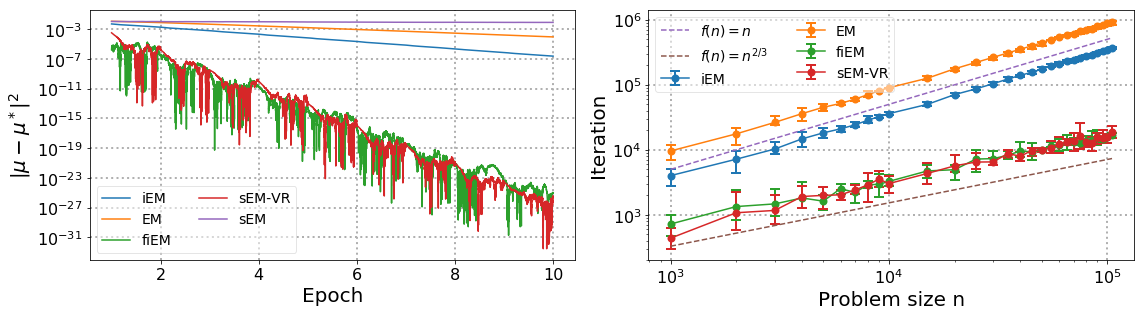

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 4.5))
ax = plt.subplot(1, 2, 1)

ax.set_yscale('log')
plt.plot(xaxisrun, iemrun, label='iEM', marker='')
plt.plot(xaxisrunem, emrun, label='EM', marker='')
plt.plot(xaxisrun, fiemrun, label='fiEM', marker='')
plt.plot(xaxisrun, svremrun, label='sEM-VR', marker='')
plt.plot(xaxisrun, oemrun, label='sEM', marker='')
leg = plt.legend(fontsize=14,fancybox=True, loc=3,ncol=2)
leg.get_frame().set_alpha(0.5)
plt.xlabel('Epoch', fontsize=20)
plt.ylabel(r'$|\mu-\mu^*|^2$', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(linestyle='dotted',linewidth=2)

ax = plt.subplot(1, 2, 2)
ax.set_yscale('log')
ax.set_xscale('log')
plt.errorbar(xaxis, iemmean, yerr=errorsiem, fmt='-o',label='iEM',capsize=5, elinewidth=2,markeredgewidth=2)
plt.errorbar(xaxis, emmean, yerr=errorsem, fmt='-o',label='EM',capsize=5, elinewidth=2,markeredgewidth=2)
plt.errorbar(xaxis, fiemmean, yerr=errorsfiem, fmt='-o',label='fiEM',capsize=5, elinewidth=2,markeredgewidth=2)
plt.errorbar(xaxis, semvrmean, yerr=errorssemvr, fmt='-o',label='sEM-VR',capsize=5, elinewidth=2,markeredgewidth=2)
plt.plot(xaxis, lin, label=r'$f(n)=n$', marker='',linestyle='dashed')
plt.plot(xaxis, np.array(3.3*xaxis**(2./3)), label=r'$f(n)=n^{2/3}$', marker='',linestyle='dashed')
leg = plt.legend(fontsize=14,fancybox=True, loc=0,ncol=2)
leg.get_frame().set_alpha(0.5)
plt.xlabel('Problem size n', fontsize=20)
plt.ylabel('Iteration', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(linestyle='dotted',linewidth=2)
fig.tight_layout()
plt.show()

In [12]:
sublin

array([  464.15888336,   736.80629973,   965.48938461,  1169.60709529,
        1357.2088083 ,  1532.61886479,  1698.49925224,  1856.63553345,
        2008.29885025,  2154.43469003,  2823.10808664,  3419.95189335,
        3968.50262992,  4481.40474656,  4966.4419419 ,  5428.83523319,
        5872.30146175,  6299.60524947,  6712.87344459,  7113.78660898,
        7503.70187622,  7883.73516311,  8254.81812224,  8617.73876013,
        8973.17113181,  9321.69751786,  9663.82529782, 10000.        ,
       10330.61554147])

In [14]:
np.array(xaxis**(2./3))

array([ 100.        ,  158.7401052 ,  208.00838231,  251.98420998,
        292.40177382,  330.19272489,  365.930571  ,  400.        ,
        432.67487109,  464.15888336,  608.22019956,  736.80629973,
        854.98797334,  965.48938461, 1069.98748057, 1169.60709529,
       1265.14899795, 1357.2088083 , 1446.24474188, 1532.61886479,
       1616.62356258, 1698.49925224, 1778.44665225, 1856.63553345,
       1933.2111166 , 2008.29885025, 2082.008046  , 2154.43469003,
       2225.66364919])